Enlace a repositorio: https://github.com/GodCarlosRojas/HPC3FINAL

Las lineas de codigo estan en celdas ocultas, esto debido a que se quiere entregar este cuaderno con la mayor presentación posible, para ver el codigo oprimir la opción de # celdas ocultas

# **0. Introducción de contexto**
Del siguiente laboratorio se busca crear un modelo de regresion lineal para un dataset de 64118 registros extraido de Datos Abiertos, el dataset corresponde a casos de accidentes de transito que ah habido desde 2010. Su modelo de regresion se basara en predecir el numero de muertos que habra en x fecha determinada. Por ej: Cuantos muertos por accidentes de transito habra el 24 de diciembre de 2022.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
!pip install sqldf
import sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Se requiere importar el Data set, en este caso el dataset es  de que cantidad de homicidios en
# accidentes de transito hay por dia desde el 2010 entra mujeres y hombre por fech
url = 'https://raw.githubusercontent.com/GodCarlosRojas/datosabiertos/main/Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv'
SF = df_homi = pd.read_csv(url)

In [ ]:
SF

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001000,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592000,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010000,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
...,...,...,...,...,...,...,...,...,...
64113,VALLE,GUADALAJARA DE BUGA,76111000,NO REPORTA,15/07/2022,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
64114,VALLE,LA VICTORIA,76403000,NO REPORTA,16/07/2022,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
64115,VALLE,PALMIRA,76520000,NO REPORTA,06/02/2022,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
64116,VALLE,PALMIRA,76520000,NO REPORTA,13/02/2022,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [ ]:
# Se cuenta cuatnas filas posee el dataset, en este caso posee 64118 Registros
len(SF)

64118

**EDA-INTRODUCTORIO**

- Se realizar un modelo de prediccion, esto tomando el 20% de datos para su entrenamiento, para al final concluir que comportamiento se obtuvo y calificar que tan bueno o que tan malo fue el modelo

- Se buscara que relacion tienen los resultados en QT para comprobar si el modelo realizado en clase es correcto o  no, y de la misma manera evaluar el comportamiento que este posee al cambiar los datos que recibe de entrenamiento

- El dataset  trabaja con datos tipo fecha, por lo cual no es necesario realizar normalizacion ni ezcalar los datos, y asi, aplicar la regresion lineal del dataset, pero, ¿sera posible que esta normalizacion aplique de forma correcta la regresion lineal y se ajuste de forma precisa al dataset?, al igual que ¿Ajusta correctamente el gradiente descendiente para encontrar los minimos verdaderos de la funcion?

# **1. Limpiar Datos**
Se ajustara el dattaset para dejar solo los datos que se creen convenientes para el analisis, y asi crear su modelo de aprendizaje, para luego poder predecir

In [ ]:
# Se requiere limpiar las columnas innecesarias para el analisis del dataset
SF = SF.drop('DESCRIPCIÓN CONDUCTA', axis=1)
SF = SF.drop('CODIGO DANE', axis=1)
SF = SF.drop('MUNICIPIO', axis=1)
SF = SF.drop('ARMAS MEDIOS', axis=1)
SF = SF.drop('GRUPO ETARÍO', axis=1)
SF = SF.drop('DEPARTAMENTO',axis=1)

In [ ]:
#Se comprueba si hay valores NaN, en este caso se evidencia que no hay datos NaN
SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64118 entries, 0 to 64117
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA HECHO  64118 non-null  object
 1   GENERO       64118 non-null  object
 2   CANTIDAD     64118 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
SF

,FECHA HECHO,GENERO,CANTIDAD
0,1/01/2010,MASCULINO,1
1,1/01/2010,FEMENINO,1
2,1/01/2010,MASCULINO,1
3,1/01/2010,MASCULINO,1
4,1/01/2010,MASCULINO,1
...,...,...,...
64113,15/07/2022,MASCULINO,1
64114,16/07/2022,FEMENINO,1
64115,06/02/2022,FEMENINO,1
64116,13/02/2022,MASCULINO,1


In [ ]:
# Se reemplazan los valores NO REPORTA por NO REPORTADO, esto ya que hacen referencia a que no
# hay reporte de el.
SF.loc[SF['GENERO'] == 'NO REPORTA', 'GENERO'] = 'NO REPORTADO'

In [ ]:
#Se eliminan las filas que en Genero no tengan masculino o femenino, para realizar de manera correcta las predicciones
SF = SF.drop(SF[SF['GENERO']=='NO REPORTADO'].index)

In [ ]:
#Se requiere convertir el tipo de variables de las columnas
SF['CANTIDAD'] = SF['CANTIDAD'].astype('int')
SF['FECHA HECHO']= pd.to_datetime(SF['FECHA HECHO'])
SF['FECHA HECHO'] = pd.to_datetime(SF['FECHA HECHO'], format='%m/%y/%d')

In [ ]:
SF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64056 entries, 0 to 64117
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA HECHO  64056 non-null  datetime64[ns]
 1   GENERO       64056 non-null  object        
 2   CANTIDAD     64056 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
# Para hacer un mejor analisis, se trabaja con variables numericas para valorar el genero
# 0 si es mujer, y 1 si es hombre
SF['GENERO'] = SF['GENERO'].replace({"MASCULINO": 1, "FEMENINO": 0})
SF['GENERO'] = SF['GENERO'].astype('int')

In [ ]:
# Luego de haber limpiado el dataset, quedaron 64118 registros
len(SF)

64056

In [ ]:
#Se requiere realizar la agrupacion de las muertes que hay por fecha, esto permite
# realizar graficas coherentes, y asi realizar el modelo de aprendizaje de forma correcta
SFN  = sqldf.run("select [FECHA HECHO],GENERO,  SUM(CANTIDAD) AS CANTIDAD FROM SF  GROUP BY [FECHA HECHO], GENERO ")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


# **Observaciones de la limpieza de datos**
Luego de haber limpiado el dataset, se descubre que habia 62 datos vacios, que a comparacion del dataset, que tenia 64118 registros, se concluye que el 0.09% de los registros estam vacios, lo que es algo insignificante, por lo cual no afecta al estudio

# **2. Analisis estadisticos y graficas**
Para realizar analisis estadisticos del dataset, esto se realizara mediante graficos, que explicaran comportamiento del mimso. Para esto se usara la libreria sqldf para realizar filtros y asi el analisis correspondiente

In [ ]:
#Se crea una copia del dataset, esto para crear su analisis estadistico
SFN_ESTADISTICA = SFN

In [ ]:
SFN_ESTADISTICA.info()
SFN_ESTADISTICA['FECHA HECHO']= pd.to_datetime(SFN_ESTADISTICA['FECHA HECHO'])
SFN_ESTADISTICA['FECHA HECHO'] = pd.to_datetime(SFN_ESTADISTICA['FECHA HECHO'], format='%m/%y/%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA HECHO  8863 non-null   object
 1   GENERO       8863 non-null   int64 
 2   CANTIDAD     8863 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 207.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


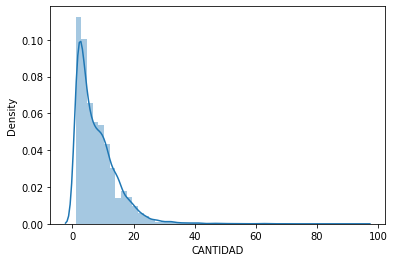

In [ ]:
#EDA Introductorio
# La grafica representa cuales son los valores dependientes que se freceuntaron mas
sns.distplot(SFN['CANTIDAD'])

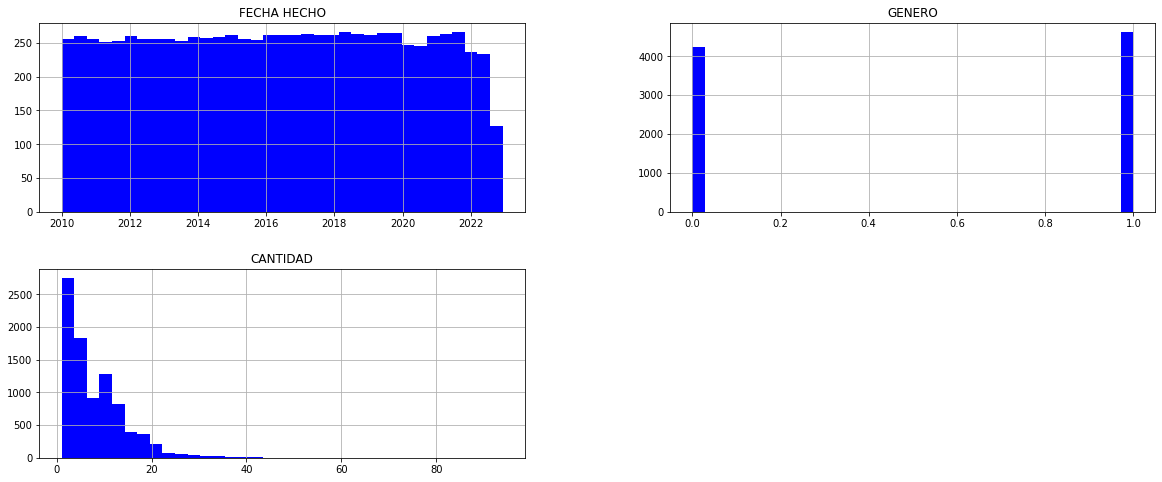

In [ ]:
#EDA introduccion
# Graficas de la cantidad de datos que pose cada una de la columnas
SFN_ESTADISTICA.hist(bins=35, figsize=(20,8), color='blue', alpha=1)
plt.show()

In [ ]:
#Se separa el mes y el año de la fecha
SFN_ESTADISTICA = SFN_ESTADISTICA.assign(YEAR=SFN_ESTADISTICA['FECHA HECHO'].dt.year )
SFN_ESTADISTICA = SFN_ESTADISTICA.assign(MES=SFN_ESTADISTICA['FECHA HECHO'].dt.month )

In [ ]:
#En este analisis estadistico la fecha no es necesario, se requiere eliminarla
SFN_ESTADISTICA = SFN_ESTADISTICA.drop('FECHA HECHO', axis=1)

In [ ]:
#Se realiza el filtro por mes
SFN_MES = sqldf.run("select MES, SUM(CANTIDAD) AS CANTIDAD FROM SFN_ESTADISTICA  GROUP BY MES ")

In [ ]:
SFN_MES

,MES,CANTIDAD
0,1,6667
1,2,5716
2,3,6380
3,4,5803
4,5,5820
5,6,5704
6,7,5987
7,8,5682
8,9,5444
9,10,5622


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1008x360 with 0 Axes>

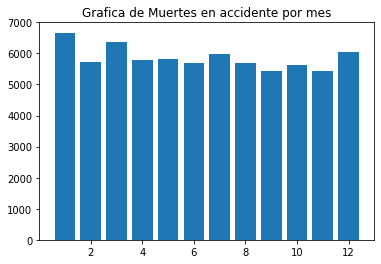

In [ ]:
# Grafica de Mes vs Cantidad
plt.figure(figsize=(14,5))
xest = SFN_MES['MES']
yest = SFN_MES['CANTIDAD']
fig, ax = plt.subplots()
ax.bar(xest, yest)
plt.title('Grafica de Muertes en accidente por mes')
plt.show

In [ ]:
# Resumen estadistico de las variables del data set
SFN_MES.describe().T

,count,mean,std,min,25%,50%,75%,max
MES,12.0,6.500000,3.605551,1.0,3.75,6.5,9.25,12.0
CANTIDAD,12.0,5858.833333,363.648140,5443.0,5667.00,5759.5,5999.75,6667.0


In [ ]:
#Se realiza el filtro por año
SFN_YEAR = sqldf.run("select YEAR , SUM(CANTIDAD) AS CANTIDAD FROM SFN_ESTADISTICA  GROUP BY YEAR")

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1008x360 with 0 Axes>

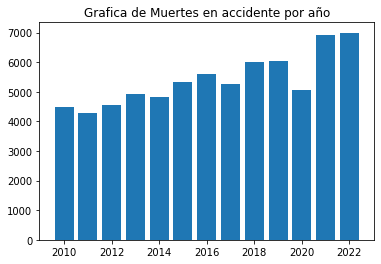

In [ ]:
plt.figure(figsize=(14,5))
xest = SFN_YEAR['YEAR']
yest = SFN_YEAR['CANTIDAD']
fig, ax = plt.subplots()
ax.bar(xest, yest)
plt.title('Grafica de Muertes en accidente por año')
plt.show

In [ ]:
# Resumen estadistico de las variables del data set
SFN_YEAR.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,13.0,2016.000000,3.894440,2010.0,2013.0,2016.0,2019.0,2022.0
CANTIDAD,13.0,5408.153846,871.095655,4290.0,4833.0,5260.0,6001.0,6997.0


In [ ]:
#Se realiza el filtro por genero
SFN_GEN = sqldf.run("select GENERO, SUM(CANTIDAD) AS CANTIDAD FROM SFN_ESTADISTICA  GROUP BY GENERO ")

In [ ]:
SFN_GEN

,GENERO,CANTIDAD
0,0,14015
1,1,56291


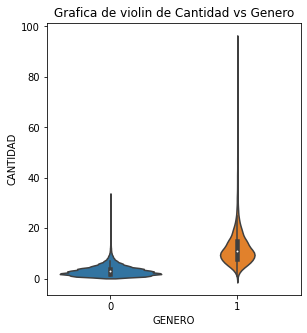

In [ ]:
#Grafica de ciolin de muertes por genero
fig = plt.figure(figsize = (10,5))
axes = fig.add_subplot(121)
sns.violinplot(data=SFN,
               x = 'GENERO',
               y='CANTIDAD', ax = axes)
axes.set_title('Grafica de violin de Cantidad vs Genero')
plt.show()

In [ ]:
SFN['CANTIDAD'].mean()

7.932528489224867

# **Observaciones de analisis estadisticos y graficas**
*  El mes que presenta mas muertes es Enero con 6667 de muertes por accidente de transito, mientras que el mes que menos reportes presenta es noviembre, con 5443 de muertes
* El año que menos muertes ah tenido es 2011 con 4290 reportes, mientras que 2022 es el año que ah reportado mas muertes en acciedentes de transito, con 6997, pero hay que agregar que esta cifra se ira actualizando con lo que qeuda de año, por lo que se espera que aumente aun mas.
* De la grafica de Violin, se deduce que en promedio,mueren mas hombres por dia en accidentes de transito
* Mueren mas hombres por accidentes de transito al año que mujeres, hombres con 56291 y mujeres con 14015 registros.
* Al dia mueren en promedio 8 personas en accidentes de transito en Colombia

# **3. Modelo Regresión Lineal**
El modelo de regresion buscara predecir cuantas muertes habran determinado dia.

In [ ]:
#Se realizara una agrupacion para trabajar cpon la cantidad exacta de muertes que hay por fecha
SFN_RL  = sqldf.run("select [FECHA HECHO],  SUM(CANTIDAD) AS CANTIDAD FROM SF  GROUP BY [FECHA HECHO]")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
#Se necesita importar el metodo StandardScaler de la libreria Skalearn para normalizar los datos
from sklearn.preprocessing import StandardScaler

In [ ]:
SFN_RL['FECHA HECHO']= pd.to_datetime(SFN_RL['FECHA HECHO'])
SFN_RL['FECHA HECHO'] = pd.to_datetime(SFN_RL['FECHA HECHO'], format='%m/%y/%d')

In [ ]:
SFN_RL['CANTIDAD'] = SFN_RL['CANTIDAD'].astype('int')

In [ ]:
x = SFN_RL["FECHA HECHO"]
y = SFN_RL["CANTIDAD"]

In [ ]:
 x = x.values.reshape(-1,1)

In [ ]:
# Por medio de la libreria sklearn train_test_split se separaran los datos de test y los de train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(x,y,test_size = 0.2, random_state =0)

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(926, 1)
(3700, 1)
(926,)
(3700,)


In [ ]:
#Se requiere importar las librerias LinearRegression, StandardScaler y pipeline para realizar
# la regresion lineal y el gradiente descendiente del modelo, para asi finalmente
# poder comparar con el modelo en QT los resultados obtenidos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline([('scaler',StandardScaler()),('RL', LinearRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('RL', LinearRegression())])

In [ ]:
#Se realizan preddiciones aplicando gradiente descendiente
# y regresion lineal, esto por medio de la libreria pipe
ytpredict = pipe.predict(X_train)
ytpredict = pipe.predict(X_test)
#predicciones
print("Prediccion: ",ytpredict)
#Evaluacion
R2 = pipe.score(X_train,y_train)
print("% Metrica de rendimiento", R2)

Prediccion:  [13.54181743 16.027009   15.28287863 16.8832686  11.47252339 16.46125494
 17.30324355 18.04533521 17.62332154 12.54080918 14.68757433 10.57752823
 17.08917865 17.60905055 18.40414875 18.51423927 19.7863964  18.27774853
 18.1513483  16.63250686 13.246204   15.38277558 13.20135231 12.30227972
 11.85376279 13.49900445 15.91691848 15.88226035 12.12898909 11.58873005
 14.84863269 12.94243571 10.8160577  15.50102096 14.70184533 18.44696173
 18.36337449 14.82416813 18.6854912  16.01069929 13.27066856 18.20435485
 14.20032184 12.31858943 13.09126179 10.72227688 12.07394383 13.51327545
 14.33895435 17.03413339 18.94440779 18.26755496 15.43985955 15.89449263
 19.74358342 18.11261275 18.14319345 15.53160166 11.57242035 14.35322534
 16.70997797 12.90777758 12.55508018 15.76401498 18.08610947 14.63049036
 11.92715647 19.3276859  13.89451484 16.54484219 13.37056551 19.39292472
 15.62538247 10.93634178 10.83848354 13.32367511 19.12381456 13.96790852
 11.51533637 16.09224782 18.4265746  1

# **4. Comparación entre modelos**
En este numeral se explicara los datos seleccionados por colab y QT, los resultados presentados por ambos se explicaran en el numeral 5 de conclusiones y resultados.
Luego de haber elaborado el modelo en colab, y obtener una metrica de 11.44%, es decir, un modelo que no es de fiar para realizar predicciones, se determino que se separa la fecha por columnas, osea el años, mes y dia por aparte en su propia columna, para luego asi poder realizar la metrica, y ver cual forma de evaluar el modelo es mejor que la otra, o si son iguales. Los resultados obtenidos son explicados en el numeral 5 de este documento
Con esto se aclara que se realizan 2 compraciones, la primera es entre el entorno en el cual se realizo, que  en este caso es colab y QT, y la segunda, compara la forma de evaluar el dataset, que por una parte es la fecha entera en una columna, y en la otra separada por columnas.

# **5. Conclusiones y Resultados**
Link de evidencia de resultados QT: https://drive.google.com/file/d/17rwhPNDQ2FBgPopzdB9dLSZYACo5-GNH/view?usp=share_link


Link de evidencia de resultados COlab: https://drive.google.com/file/d/1s7NgDDbgZFCzjccrtOm3-6w0_0IKsP0p/view?usp=share_link


La metrica de rendimiento seleccionada en este caso fue R2, ya que, esta métrica es el coeficiente de determinación y representa la proporción de la varianza de y que es explicada por las variables independientes del modelo. Lo cual se determino que era combeniente para evaluar el modelo de este dataset.

0. De los resultados obtenidos, se concluye que el dataset trabajado (Muertes por accidentes de trafico) no se pueden elaborar predicciones confiables, debido a que estimar cuantas persona moriran x dia es bastante aleatorio, aunque se cuente con un gran dataset, del cual se pueda comparar y "sacar estimaciones", eso en este caso no funciona. ESto fue demostrado de dos formas, la primera fue en colab, que se trabajo la variable independiente como tipo fecha, dejando una metrica de rendimiento del 11.44%, osea, una metrica bastante mala, y la segunda manera, fue en QT, en la cual se separo las variables de la fecha, es decir, año, mes y dia quedaron como columnas independientes, de esta forma la metrica dio 52,54%, que aunque a comparacion de colab aumentara en gran medida, confirma que el modelo no es de fiar.


1. Lo unico que tiene de confiable el modelo es que las muertes aumentaran respecto al año anterior, esa es la unica conclusión confiable que se puede sacar del modelo de regresión.


2. Se demostro que los promedios de los valores dependientes es 7.9, osea en promedio mueren aproximadamente 8 personas al dia


3. La cantidad de filas tomadas para el entrenamiento concuerda con las tomadas en QT, que es el 20% del total del dataframe


4. Se concluye que phyton y c++ tienen diferente paradigma para seleccionar el 20% de un conjunto de datos, en c++ eigen siempre va a ser aleatorio, mientras que en phyton se puede ajustar para trabajar con la misma semilla de datos aleatorios, y asi al analizar resultados se realice de manera mas precisa. Pero en este caso, para elaborar el estudio lo mas preciso posible, se trabajo con los mismos datos de entrenamiento.


5. Normalizar es un proceso fundamental para manipular los datos, esto ya que ajusta mas efectivamente y borra las barreras producidas por la variacion del rango de datos, pero en este caso al trabajar con fechas, no se requiere de este procedimiento. Aunque en QT se separa la fecha por columnas, no se requiere aplicar la normalización.


6. El modelo que se halló no es preciso, y solo cuenta con el 11.44% (colab)de predicción, esto hace que no sea de fiar. Esto ocurre ya que el dataset escogido es algo aleatorio, no se puede predecir cuantas personas moriran en un dia determinado, por lo que "atinarle" al numero exacto de muertes por dia es imposible. Lo unico que se puede tener certeza es que este numero es ascendente si se evalua por año


# **6. Recomendaciones**
En esta numeral, no se recomendara cual explicación es mejor que la otra. Se recomendara que para realizar un estudio academico de un dataset, que permita realizar predicciones de fiar creando un modelo de regresión, no se recomienda que el tema del dataset sea algo tan aletorio como lo es el el numero de muertes por accidente de trafico, debido a que este tipo de datos no se permiten representar de forma lineal, ya que no dependen de valores del pasadao, depende de mas factores como lo es decisiones politicas, estado actual de las vias, numero de carros en la ciudad, el horario, el trafico (esto en el caso del dataset de este ejercicio), etc.

# **7. REFERENCIAS:**
1. Normalizar: https://www.delftstack.com/es/howto/python-pandas/pandas-normalize/
2. Pipeline: https://medium.com/datos-y-ciencia/pipeline-python-20c84e255444
3. Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
4. LinearRegression: https://towardsdatascience.com/glr-with-python-and-scikit-learn-library-67b5b0d418ea
5. Skelearn: https://scikit-learn.org/stable/
6. Regresion lineal: https://www.youtube.com/watch?v=SsFBnvkoZa4&ab_channel=EstadigrafoMenteEstadistica
7. Gradiente descendiente 1: https://www.youtube.com/watch?v=IKloEocn3Hw&ab_channel=CodificandoBits
8. Gradiente descendiente 2:https://www.youtube.com/watch?v=A6FiCDoz8_4&ab_channel=DotCSV
9. SQLite: https://datacarpentry.org/python-ecology-lesson-es/09-working-with-sql/index.html
10. Group by: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#:~:text=A%20groupby%20operation%20involves%20some,compute%20operations%20on%20these%20groups.&text=Used%20to%20determine%20the%20groups%20for%20the%20groupby.
11. Datos abiertos: https://www.datos.gov.co/
